In [15]:
import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF, DCD, GRO, XTC

import warnings
# suppress some MDAnalysis warnings about PSF files
#warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt

import os

General settings

In [16]:
results = os.environ['SCRATCHDIR']
results = '/Volumes/BackFam/càlculs/lavandula/'
name='dao_noNAG'
run='md'

######

parmfile=results+'/'+name+'.parm7'
trajfile=results+'/'+run+name+'.nc'

In [17]:
# some information
u = mda.Universe(parmfile,trajfile)
print('Universe:',u)
#print(hasattr(u, 'trajectory'))
print('Trajectory of run {0} contains {1} steps'.format(run,len(u.trajectory)))
#print(u.residues)
#print(u.atoms)
#print(u.select_atoms('resname TPQ').n_atoms)
#print(u.atoms[:45].names)

Universe: <Universe with 174032 atoms>
Trajectory of run md contains 23 steps


/Users/jordivilla/miniconda3/lib/python3.12/site-packages/MDAnalysis/topology/TOPParser.py:306: UserWarning: Unknown ATOMIC_NUMBER value found for some atoms, these have been given an empty element record. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(msg)


visualize trajectory

In [18]:
import nglview as nv
view = nv.show_mdanalysis(u.select_atoms('resid 1-5'))
view

NGLWidget(max_frame=22)

In [19]:
tre = u.select_atoms('resid 1-5')
print(tre.names)
print(tre.center_of_mass())

['N' 'H1' 'H2' 'H3' 'CA' 'HA' 'CB' 'HB' 'CG1' 'HG11' 'HG12' 'HG13' 'CG2'
 'HG21' 'HG22' 'HG23' 'C' 'O' 'N' 'H' 'CA' 'HA' 'CB' 'HB2' 'HB3' 'CG'
 'HG2' 'HG3' 'CD' 'OE1' 'NE2' 'HE21' 'HE22' 'C' 'O' 'N' 'H' 'CA' 'HA' 'CB'
 'HB2' 'HB3' 'CG' 'ND1' 'CE1' 'HE1' 'NE2' 'HE2' 'CD2' 'HD2' 'C' 'O' 'N'
 'CD' 'HD2' 'HD3' 'CG' 'HG2' 'HG3' 'CB' 'HB2' 'HB3' 'CA' 'HA' 'C' 'O' 'N'
 'H' 'CA' 'HA' 'CB' 'HB2' 'HB3' 'CG' 'HG' 'CD1' 'HD11' 'HD12' 'HD13' 'CD2'
 'HD21' 'HD22' 'HD23' 'C' 'O']
[30.40788661 46.11896368 46.98621437]


In [20]:
for ts in u.trajectory[:20]:
    time = u.trajectory.time
    rgyr = u.atoms.radius_of_gyration()
    print("Frame: {:3d}, Time: {:5.1f} ps, Rgyr: {:.4f} A".format(ts.frame, time, rgyr))

Frame:   0, Time:  22.0 ps, Rgyr: 54.8945 A
Frame:   1, Time:  24.0 ps, Rgyr: 54.8181 A
Frame:   2, Time:  26.0 ps, Rgyr: 54.7795 A
Frame:   3, Time:  28.0 ps, Rgyr: 54.7139 A
Frame:   4, Time:  30.0 ps, Rgyr: 54.6783 A
Frame:   5, Time:  32.0 ps, Rgyr: 54.6573 A
Frame:   6, Time:  34.0 ps, Rgyr: 54.6090 A
Frame:   7, Time:  36.0 ps, Rgyr: 54.5833 A
Frame:   8, Time:  38.0 ps, Rgyr: 54.5583 A
Frame:   9, Time:  40.0 ps, Rgyr: 54.5581 A
Frame:  10, Time:  42.0 ps, Rgyr: 54.5245 A
Frame:  11, Time:  44.0 ps, Rgyr: 54.4884 A
Frame:  12, Time:  46.0 ps, Rgyr: 54.4376 A
Frame:  13, Time:  48.0 ps, Rgyr: 54.3817 A
Frame:  14, Time:  50.0 ps, Rgyr: 54.4060 A
Frame:  15, Time:  52.0 ps, Rgyr: 54.3972 A
Frame:  16, Time:  54.0 ps, Rgyr: 54.3645 A
Frame:  17, Time:  56.0 ps, Rgyr: 54.3468 A
Frame:  18, Time:  58.0 ps, Rgyr: 54.3326 A
Frame:  19, Time:  60.0 ps, Rgyr: 54.3413 A


collect data in a list first

In [21]:
rgyr = []
time = []

for ts in u.trajectory:
    time.append(u.trajectory.time)
    rgyr.append(tre.radius_of_gyration())

now transform into a pandas dataframe and plot

In [22]:
import pandas as pd
rgyr_df = pd.DataFrame(rgyr, columns=['Radius of gyration (A)'], index=time)
rgyr_df.index.name = 'Time (ps)'

rgyr_df.head()

,Radius of gyration (A)
Time (ps),
22.0,4.927732
24.0,5.085068
26.0,4.858526
28.0,4.989809
30.0,4.919489


<Axes: title={'center': 'Radius of gyration'}, xlabel='Time (ps)'>

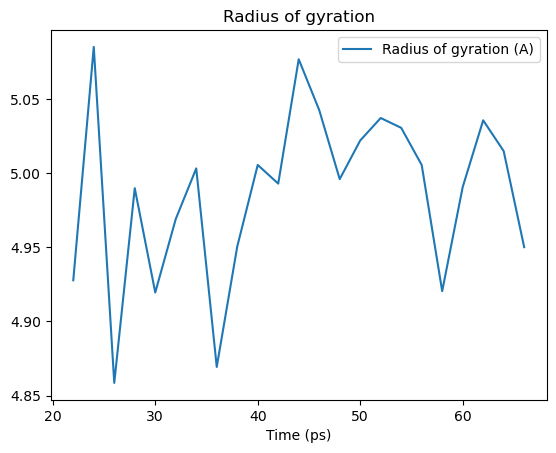

In [23]:
%matplotlib inline

rgyr_df.plot(title='Radius of gyration')

test the change in RMSD from the first to the last snapshot in the trajectory

In [24]:
from MDAnalysis.analysis import rms


u.trajectory[0] # first frame
first = tre.positions


u.trajectory[-1] #last frame
last = tre.positions

print(first,last)

rms.rmsd(first, last)

[[33.60812  42.922806 43.080223]
 [34.419235 43.465492 42.820065]
 [33.817833 42.213093 43.767563]
 [33.241898 42.39986  42.297596]
 [32.572826 43.7561   43.62944 ]
 [32.936646 44.305397 44.497776]
 [31.876299 44.6864   42.66396 ]
 [30.930328 44.933407 43.145863]
 [32.572132 46.0217   42.68729 ]
 [32.077145 46.78724  42.077095]
 [32.68688  46.391052 43.71385 ]
 [33.607624 45.936195 42.335354]
 [31.65329  44.142754 41.28655 ]
 [30.887243 44.797604 40.85324 ]
 [32.514114 44.31417  40.628513]
 [31.311745 43.10068  41.257545]
 [31.479326 42.792408 44.160603]
 [31.05518  41.89514  43.478813]
 [31.044632 43.008785 45.38928 ]
 [31.458221 43.80482  45.853363]
 [29.842087 42.415455 46.05281 ]
 [29.175846 42.092796 45.25274 ]
 [30.220346 41.159252 46.92007 ]
 [30.934847 41.364082 47.717335]
 [29.346647 40.723442 47.404655]
 [30.759068 40.07982  45.998436]
 [29.999102 39.703945 45.313404]
 [31.552402 40.457535 45.353416]
 [31.179388 38.903297 46.93602 ]
 [30.54331  37.90505  46.959644]
 [32.16409

7.106723814053688

now run a complete RMSD plot

The results are stored in the `.rmsd` attribute. This is an array with the shape `(n_frames, 2 + n_selections)`.

In [25]:
u.trajectory[0] # set to first frame
rmsd_analysis = rms.RMSD(u, select='backbone')
rmsd_analysis.run()
rmsd_analysis.results.rmsd.shape
print(rmsd_analysis.rmsd.shape)

rmsd_df = pd.DataFrame(rmsd_analysis.results.rmsd,
                       columns=['Frame', 'Time (ns)', 'Backbone'])
rmsd_df.head()



(23, 3)


/Users/jordivilla/miniconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


,Frame,Time (ns),Backbone
0,0.0,22.0,0.000003
1,1.0,24.0,0.532856
2,2.0,26.0,0.544003
3,3.0,28.0,0.596421
4,4.0,30.0,0.614963


Text(0, 0.5, 'RMSD ($\\AA$)')

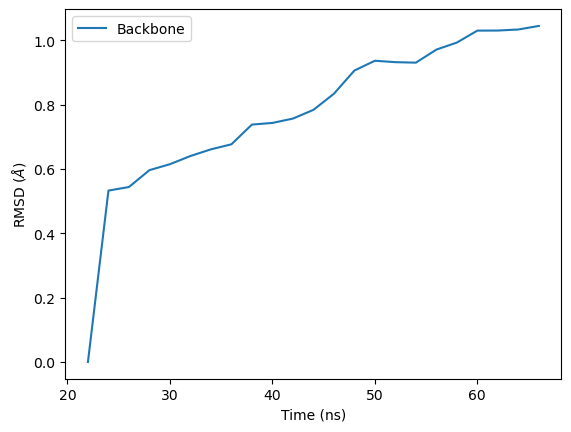

In [26]:
ax = rmsd_df.plot(x='Time (ns)', y=['Backbone'],kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')

# Fast processing of output with `process_mdout.perl`

In [27]:
import subprocess
# if needed, variable output can be a multiple collection of files separated by a space
output = results+'/'+run+name+'.mdout'
pipe = subprocess.Popen(["process_mdout.perl",output])

plot a collection of graphs to check the process of the calculation


['Time(ps)', 'DENSITY']
['Time(ps)', 'EKCMT']
['Time(ps)', 'EKTOT']
['Time(ps)', 'EPTOT']
['Time(ps)', 'ESCF']
['Time(ps)', 'ETOT']
['Time(ps)', 'PRES']
['Time(ps)', 'TEMP']
['Time(ps)', 'TSOLUTE']
['Time(ps)', 'TSOLVENT']
['Time(ps)', 'VOLUME']
          DENSITY
Time(ps)         
0.0           NaN
0.2           NaN
0.4           NaN
0.6           NaN
0.8           NaN
Processing sander output file (/Volumes/BackFam/càlculs/lavandula//mddao_noNAG.mdout)...
Starting output...
Outputing summary.TEMP
Outputing summary_avg.TEMP
Outputing summary_rms.TEMP
Outputing summary.TSOLUTE
Outputing summary_avg.TSOLUTE
Outputing summary_rms.TSOLUTE
Outputing summary.TSOLVENT
Outputing summary_avg.TSOLVENT
Outputing summary_rms.TSOLVENT
Outputing summary.PRES
Outputing summary_avg.PRES
Outputing summary_rms.PRES
Outputing summary.EKCMT
Outputing summary_avg.EKCMT
Outputing summary_rms.EKCMT
Outputing summary.ETOT
Outputing summary_avg.ETOT
Outputing summary_rms.ETOT
Outputing summary.EKTOT
Outputing 

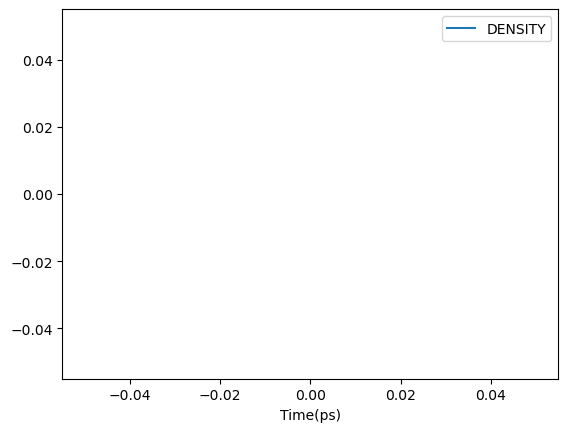

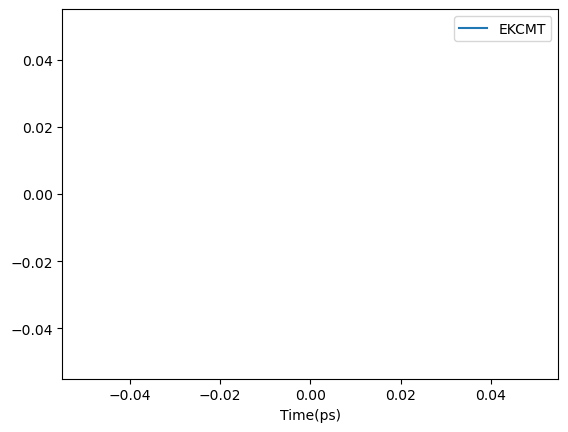

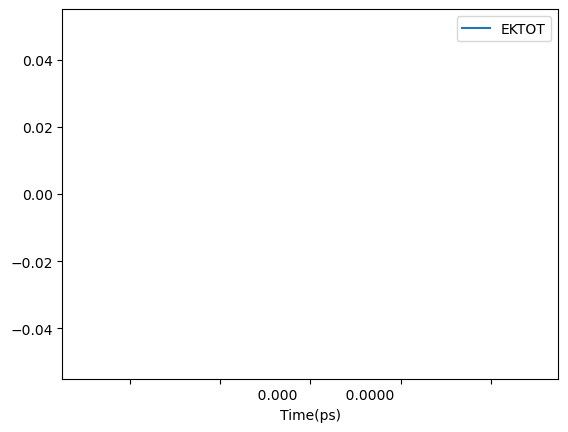

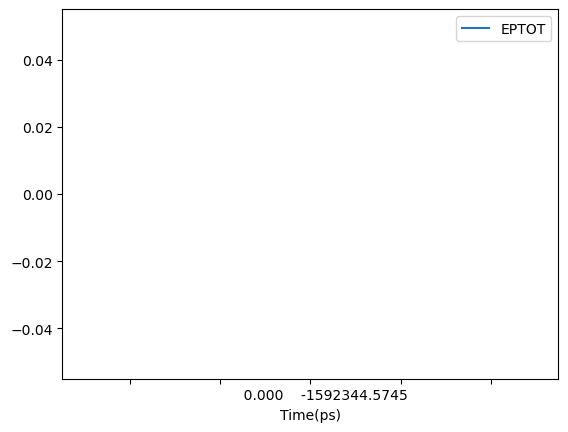

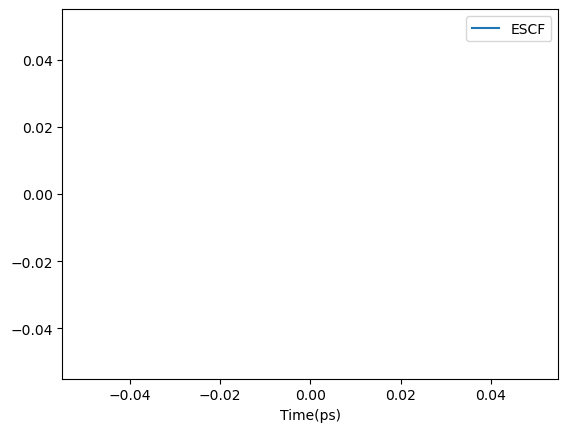

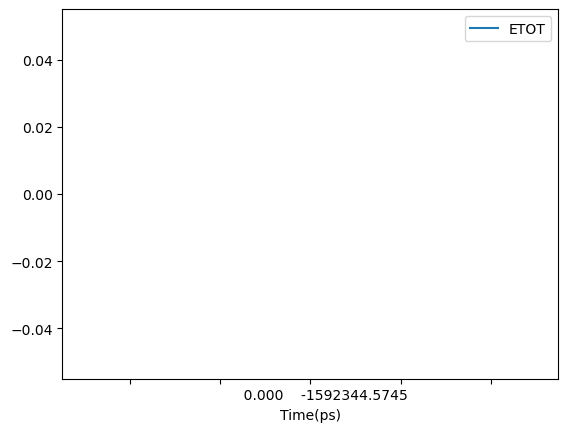

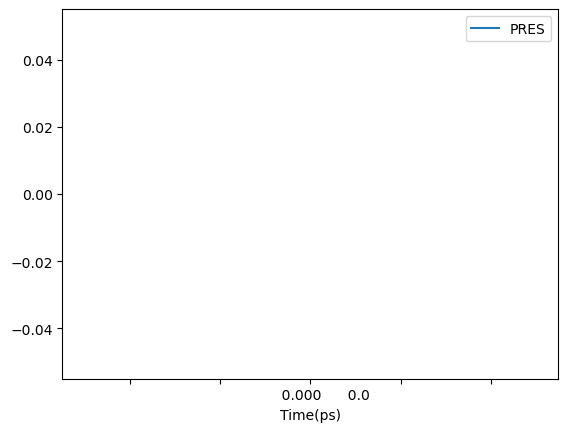

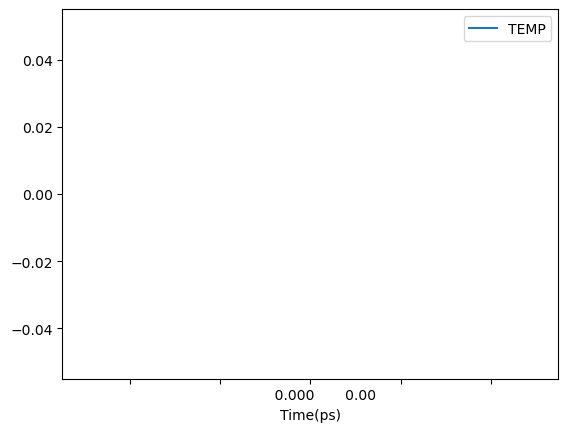

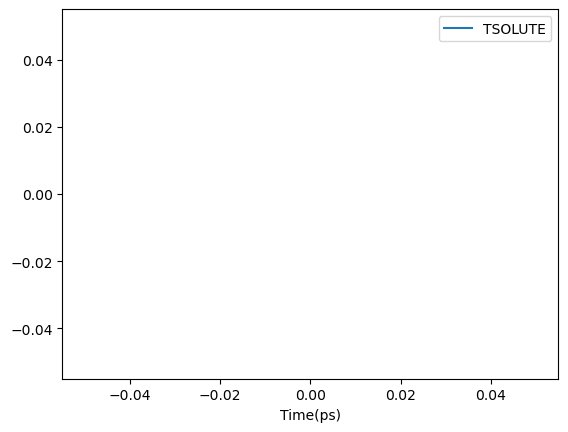

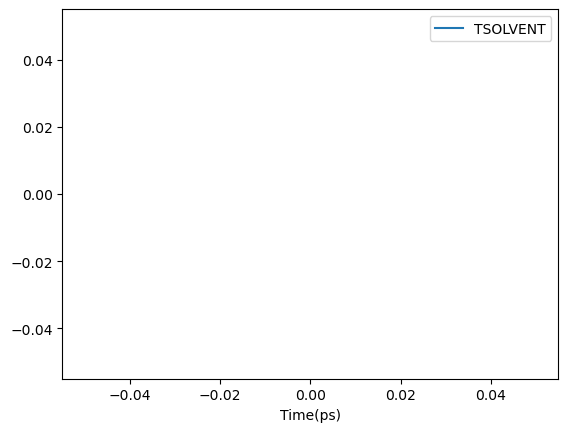

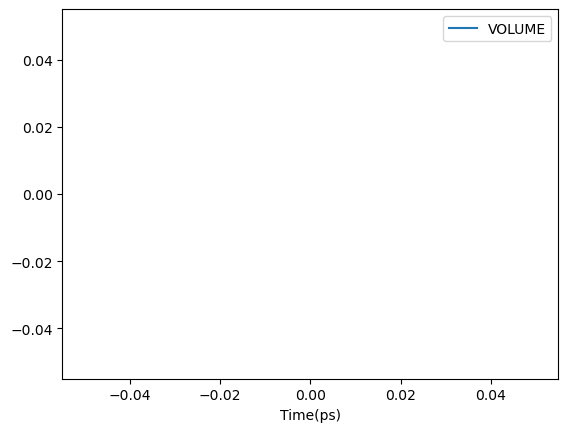

In [28]:
# assign dataset names
list_of_names = ['DENSITY','EKCMT','EKTOT','EPTOT','ESCF','ETOT','PRES','TEMP','TSOLUTE','TSOLVENT','VOLUME']
 
# create empty list
dataframes_list = []
 
# append datasets into the list
for i in range(len(list_of_names)):
    colnames=['Time(ps)',list_of_names[i]]
    print(colnames)
    temp_df = pd.read_table("SUMMARY."+list_of_names[i],names=colnames,header=None,index_col=0)
    dataframes_list.append(temp_df)

for i in range(len(list_of_names)):
    print(dataframes_list[i].head())
    dataframes_list[i].plot()